# Dot-Product Attention

The first attention mechanism we will focus on is dot-product (encoder-decoder) attention. When we perform many NLP tasks we would typically convert a word into a vector (*word2vec*), with transformers we perform the same operation. These vectors allows us to represent meaning numerically (eg days of the week may be clustered together, or we can perform logical arithmetic on the vectors - *King - Man + Woman = Queen*).

Because of this, we would expect sentences with similar meaning to have a similar set of values. For example, in neural machine translation, the phrase *"Hello, how are you?"*, and the Italian equivalent *"Ciao, come va?"* should share a similar matrix representation.

Now, when we iterate through each word, and compare the individual vectors between the two sequences - we should find that words such as *"Hello"* and *"Ciao"* have higher similarity than words that have different meaning such as *"are"* and *"Ciao"*.

![Attention function logic](../../assets/images/nmt_attention.png)

We can display this mapping between word attentions better using a heatmap:

![Attention heatmap example](../../assets/images/attention_heatmap.png)

## Calculating Alignment

This similarity between word vectors is known as *'alignment'*, and we calculate alignment between two vectors using the dot product. The dot product formula looks like:

$$
u \cdot v = \vert u \vert \vert v \vert cos \theta = \sum_{i=1}^{n}a_n b_n
$$

So, let's imagine rather than a high-dimensional vector (as we would usually expect with word vectors), we have simple, three-dimensional vectors which can be visualized. We have three of these vectors each representing a word:

In [12]:
hello = [0.71, 0.14, 0.51]
hi = [0.69, 0.15, 0.48]
tomato = [0.16, 0.59, 0.49]

We can plot each of these onto a 3D chart:

*(You need to install `jupyterlab-matplotlib` for interactive plot, [see here](https://github.com/matplotlib/ipympl#installation))*

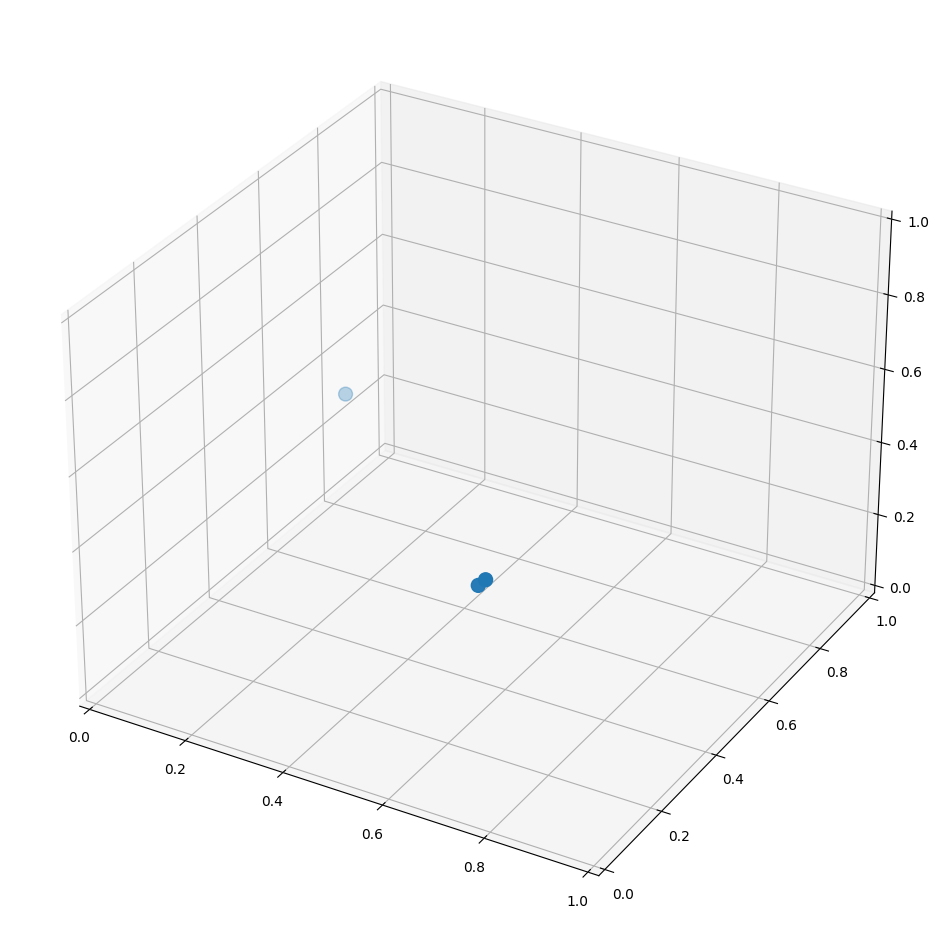

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

xs = [hello[0], hi[0], tomato[0]]
ys = [hello[1], hi[1], tomato[1]]
zs = [hello[2], hi[2], tomato[2]]

ax.scatter(xs, ys, zs, s=100)

ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_zlim((0,1))

plt.show()

The vectors for *hello* and *hi* share the same area, with *tomato* out to the upper-left. To measure alignment between each of these vectors, we calculate the dot product of each - we'll rename the vectors as otherwise the next part will look very messy:

**a** = hello = \[0.71, 0.14, 0.51\]
**b** = hi = \[0.69, 0.15, 0.48\]
**c** = tomato \[0.16, 0.59, 0.49\]

Now, to calculate the dot product between each of these vectors we do:

$$
a \cdot b = \sum_{i=1}^{n}a_n b_n = (a_1 b_1) + (a_2 b_2) + (a_3 b_3) = (0.71*0.69)+(0.14*0.15)+(0.51*0.48)
$$

Or, using Numpy:

In [14]:
import numpy as np

a = np.array(hello)
b = np.array(hi)
c = np.array(tomato)

np.matmul(a, b.T)

0.7556999999999999

In [15]:
np.matmul(a, c.T)

0.4461

In [16]:
np.matmul(b, c.T)

0.4341

Clearly, vectors **a** and **b** have better alignment between themselves than either to with **c**, as would be expected. It is this exact calculation that we perform for calculating the **alignment** vector, which we then use to calculate the *dot-product attention* between two sequences - however, rather than comparing word-to-word, we are comparing every word across the whole sequence in a single parallel operation.

## Queries, Keys, and Values

In dot-product attention, there are three tensors that we will be comparing. The query **Q**, key **K**, and value **V**. K and V are usually the same and are derived from (in our case) the English text, Q is another tensor which is derived from the Italian text.

The first thing we do is calculate the alignment vector between our English and Italian sequences, *K* and *Q* using the dot product, just as we did before.

![Dot product attention given an English sequence, and Italian sequence](../../assets/images/dot_product_attention.png)

Once we calculate the dot product, we apply a softmax function to convert the dot product alignment into probabilities. These are then multiplied by *V* to give us the attention tensor **z**.